### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Load Dataset

Sources:<br>https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset (for data set)<br>https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model (for explanation of features)

In [2]:
heart = pd.read_csv("heart.csv", on_bad_lines="skip")

heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Explore dataset

In [ ]:
# Number of rows and columns
print("This dataset has", heart.shape[0], "rows and", heart.shape[1], "columns.")

This dataset has 303 rows and 14 columns.


In [ ]:
# Get column data types and check if any need to have type changed.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Check for nulls (second check after previous cell)
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Descriptive Statistics of dataset

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 Mean age is just over 54 years.<br>
 68% of data set is male.<br>
 54% of data set has heart disease.

In [ ]:
## Breakdown heart disease by sex
pd.DataFrame(heart.value_counts(["sex", "output"]))

count
sex output       
1   0         114
    1          93
0   1          72
    0          24

### Visualizations

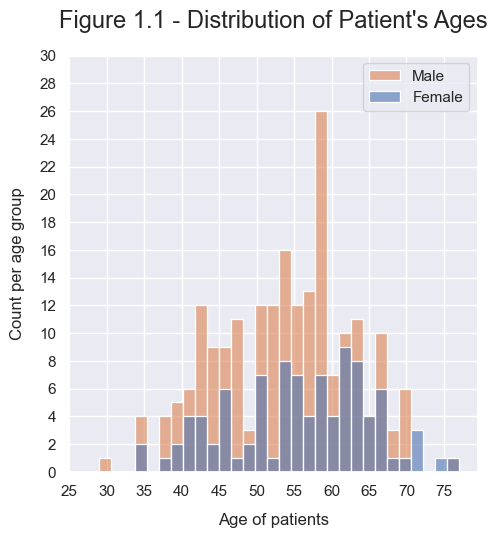

In [ ]:
ax = sns.displot(heart, x="age", hue="sex", hue_order=[0, 1], bins=30, alpha=0.6)

# Customize plot
plt.xlabel("Age of patients", labelpad=10)
plt.xticks(np.arange(25, 80, 5))

plt.ylabel("Count per age group", rotation=90, labelpad=10)
plt.yticks(np.arange(0, 32, 2))

plt.title("Figure 1.1 - Distribution of Patient's Ages", fontsize=17, pad=20)
plt.legend(labels=["Male","Female"])
ax._legend.remove()

# Show plot
plt.show()

Plot shows normal distribution of patient's ages in data set.<br>
The modal value appears to be 58 years of age.

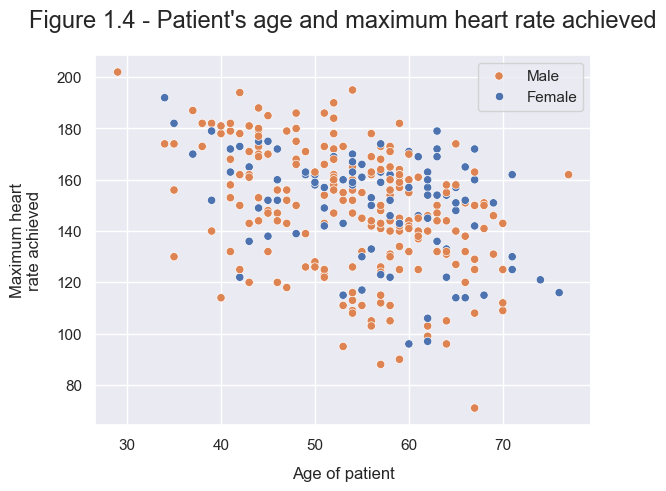

In [ ]:
sns.scatterplot(data=heart, x="age", y="thalachh", hue="sex", hue_order=[0,1])

# Customize plot
plt.xlabel("Age of patient", labelpad=10)
plt.ylabel("Maximum heart\nrate achieved", rotation=90, labelpad=10)

plt.title("Figure 1.4 - Patient's age and maximum heart rate achieved", fontsize=17, pad=20)
plt.legend(labels=["Male","Female"])

# Show plot
plt.show()

In [ ]:
#sns.pairplot(data=heart, kind="scatter")
#plt.show()

### Select inputs and features

In [3]:
X = heart.drop("output", axis=1)
y = heart["output"]

In [4]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=20)

### Scikit-Learn config

In [5]:
# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

### Scale Inputs

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=16, max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

### Confusion Matrix

In [7]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

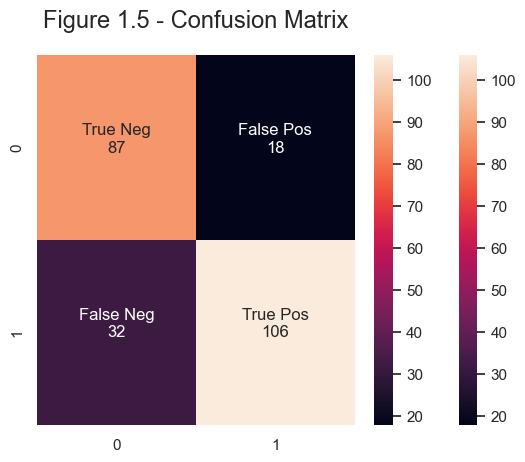

In [8]:
labels = ['True Neg\n\n','False Pos\n\n','False Neg\n\n','True Pos\n\n']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='0')
sns.heatmap(confusion_matrix, annot=True, fmt='0')
plt.title("Figure 1.5 - Confusion Matrix", fontsize=17, pad=20)
plt.show()

### P-values

In [9]:
from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)
p_values = f_regression(x_train,y_train)[1]
p_values.round(3)

array([0.331, 0.027, 0.005, 0.018, 0.22 , 0.361, 0.048, 0.009, 0.001,
       0.033, 0.04 , 0.   , 0.004])

In [10]:
cols_to_test = heart.columns.values[:-1]

reg_summary = pd.DataFrame(data=cols_to_test, columns=["Feature Name"])
reg_summary["p-value"] = p_values.round(3)
reg_summary["Weight"] = log_reg.coef_[[0][0]]
reg_summary

,Feature Name,p-value,Weight
0,age,0.331,0.098794
1,sex,0.027,-0.878133
2,cp,0.005,0.439279
3,trtbps,0.018,-0.063229
4,chol,0.220,0.000494
5,fbs,0.361,-0.385744
6,restecg,0.048,-0.169782
7,thalachh,0.009,0.049630
8,exng,0.001,-1.127323
9,oldpeak,0.033,-0.042798


### Calculate Accuracy

In [ ]:
print("Training accuracy is", round(log_reg.score(x_train, y_train), 2))
print("Testing accuracy is", round(log_reg.score(x_test, y_test), 2))

Training accuracy is 0.88
Testing accuracy is 0.79


In [11]:
print("Bias is", round(float(log_reg.intercept_), 2))

Bias is -2.31
